In [4]:
# !kaggle competitions download -c cifar-10

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [6]:
filenames = os.listdir('data/train')

In [7]:
len(filenames)  #images

50000

In [8]:
print(filenames[:5])

['1.png', '10.png', '100.png', '1000.png', '10000.png']


label processing

In [9]:
labels_df = pd.read_csv('data/trainLabels.csv')

In [10]:
labels_df.shape  #labels for training data images

(50000, 2)

In [11]:
labels_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [12]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

every object have 5000 images in train data

In [13]:
label_dict = {'airplane':0, 'automobile':1, 'bird':2,
              'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7,
              'ship':8, 'truck':9}

In [14]:
labels = [label_dict[i] for i in labels_df['label']]

In [15]:
print(labels[:5])  #label in numbers
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


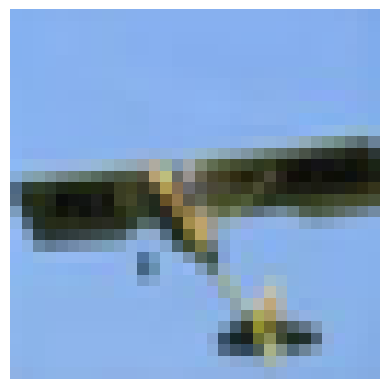

In [16]:
# dispaly sample image
import cv2

img = cv2.imread('data/train/664.png')
if img is not None:
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [17]:
labels_df[labels_df['id'] == 664]

,id,label
663,664,airplane


In [18]:
id_list = list(labels_df['id'])

In [19]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


image processing

In [20]:
# conver images to numpy array

# train_data_folder = 'data/train/'
# data = []

# for id in id_list:
#     path = train_data_folder + str(id) + '.png'
#     image = Image.open(path)
#     image = np.array(image)
#     data.append(image)

In [21]:
data = np.load('numpy_image.npy')

In [22]:
type(data)

numpy.ndarray

In [23]:
len(data)

50000

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(32, 32, 3)

In [26]:
np.save('numpy_image.npy', data)

In [27]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [28]:
X = np.array(data)
Y = np.array(labels)

In [29]:
print(X.shape)  # 32 X 32 pixel image with 3 color channel(RGB)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


train test split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=2)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

scaling data point into 0 and 1 interval

In [32]:
x_test_scaled = x_test / 255
x_train_scaled = x_train / 255

In [33]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

building NN

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_class = 10

#setting up layers of NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_class, activation='softmax')
])

compile NN

In [36]:
model.compile(optimizer='adam',
              metrics=['acc'],
              loss='sparse_categorical_crossentropy')

In [37]:
model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.10)

Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.9516 - acc: 0.2931 - val_loss: 1.8905 - val_acc: 0.3035
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8097 - acc: 0.3507 - val_loss: 1.7752 - val_acc: 0.3540
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.7548 - acc: 0.3721 - val_loss: 1.7907 - val_acc: 0.3495
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 1.7194 - acc: 0.3885 - val_loss: 1.6689 - val_acc: 0.3972
Epoch 5/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.6984 - acc: 0.3959 - val_loss: 1.6827 - val_acc: 0.3900
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6841 - acc: 0.4013 - val_loss: 1.6894 - val_acc: 0.3930
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6705 - acc: 0.4047 - val_loss: 1.6600 - val_acc: 0.3968
Epoch 8/10
1125/1125 [==============================] - 4s 4ms

ResNet50

In [38]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [39]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [40]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))


In [41]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [1]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()